In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df_null= pd.DataFrame(df.isnull().sum())
df_null

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
df.duplicated().sum()
print("The Total duplicated values in this Dataset are :",df.duplicated().sum())

The Total duplicated values in this Dataset are : 0


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

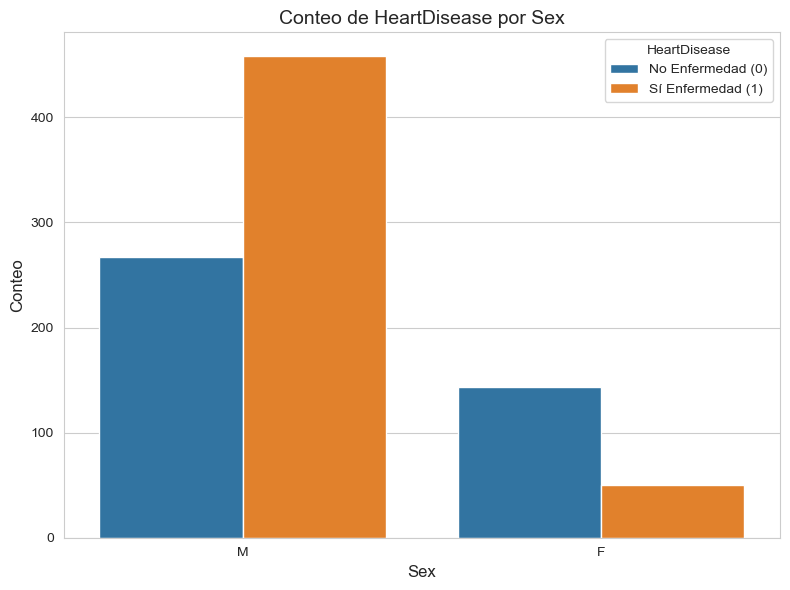

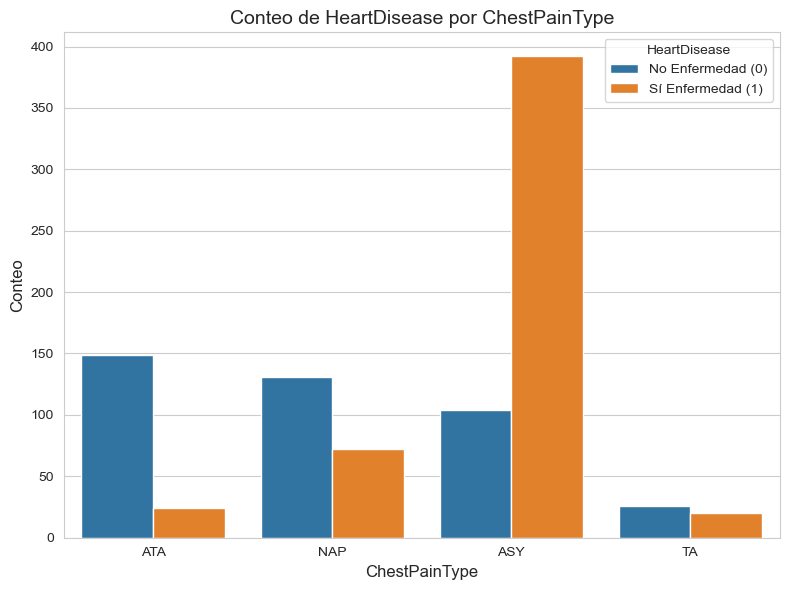

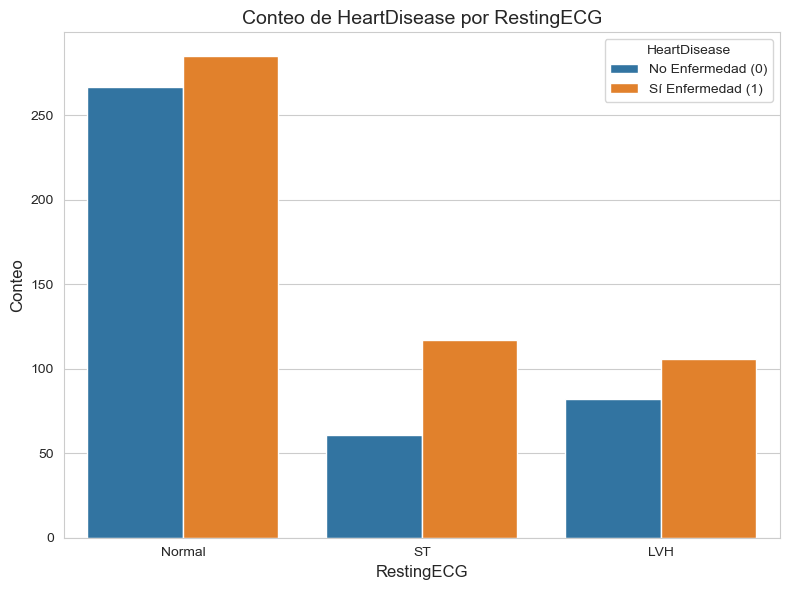

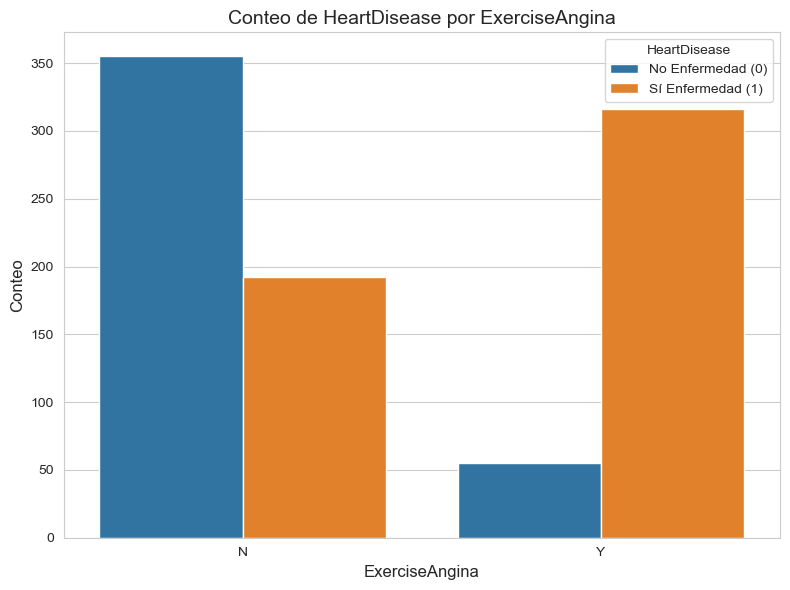

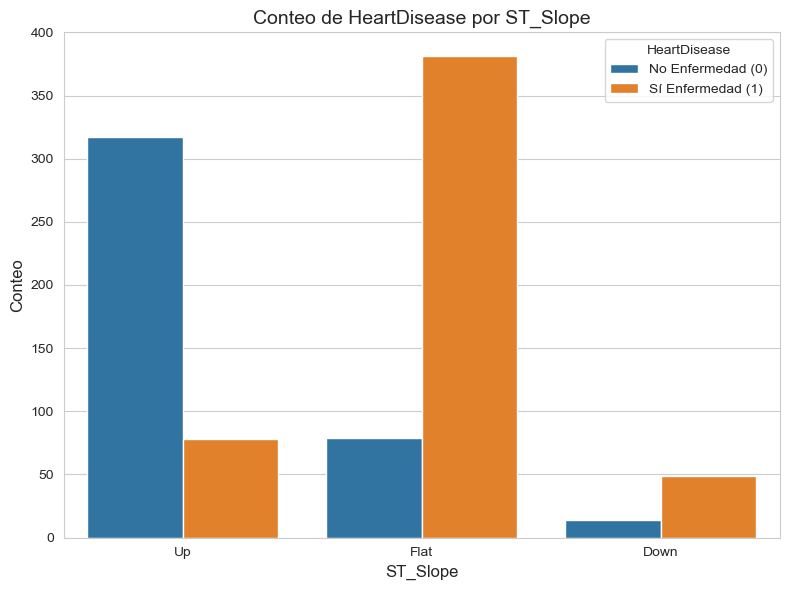

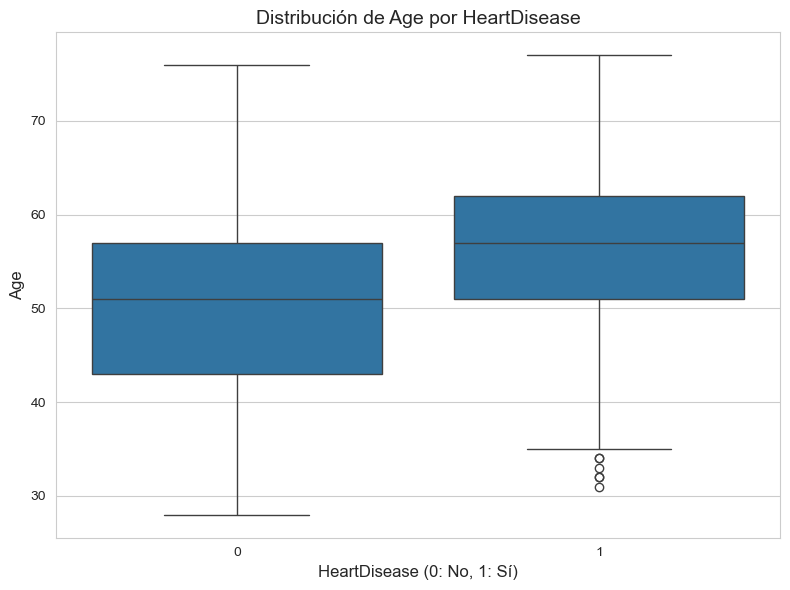

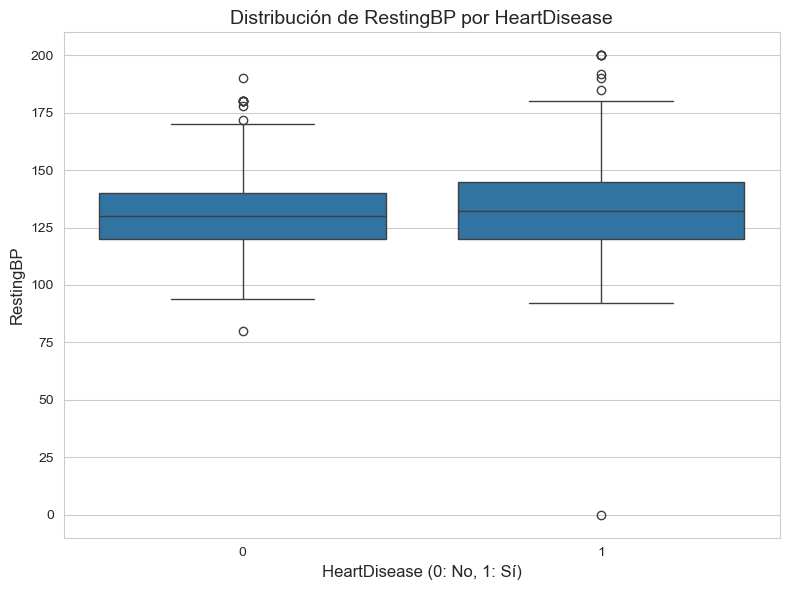

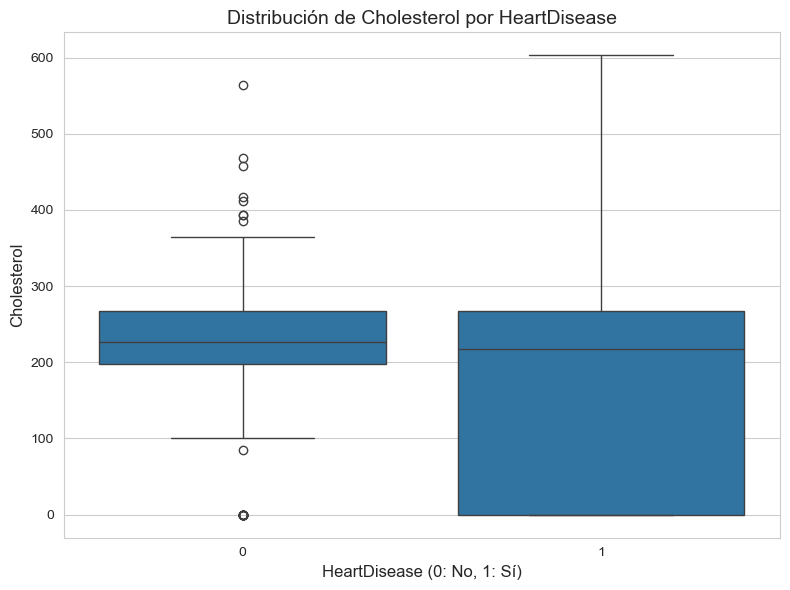

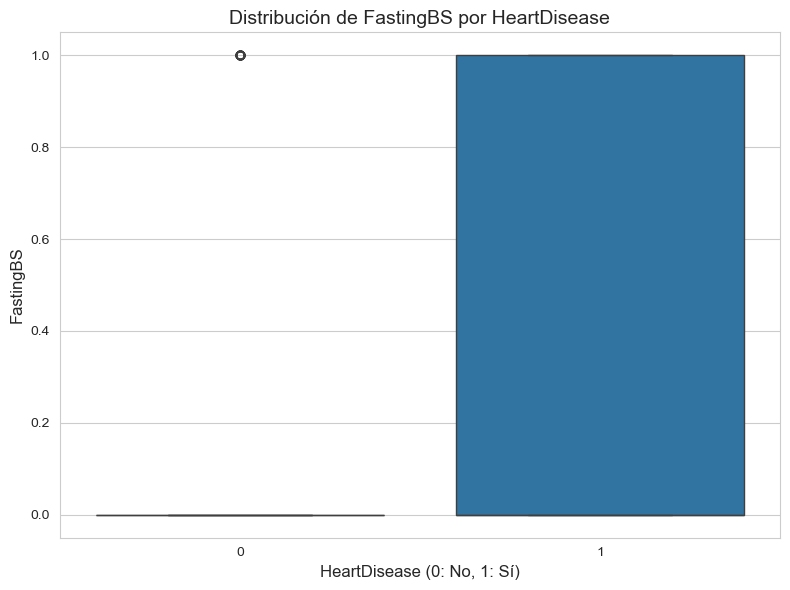

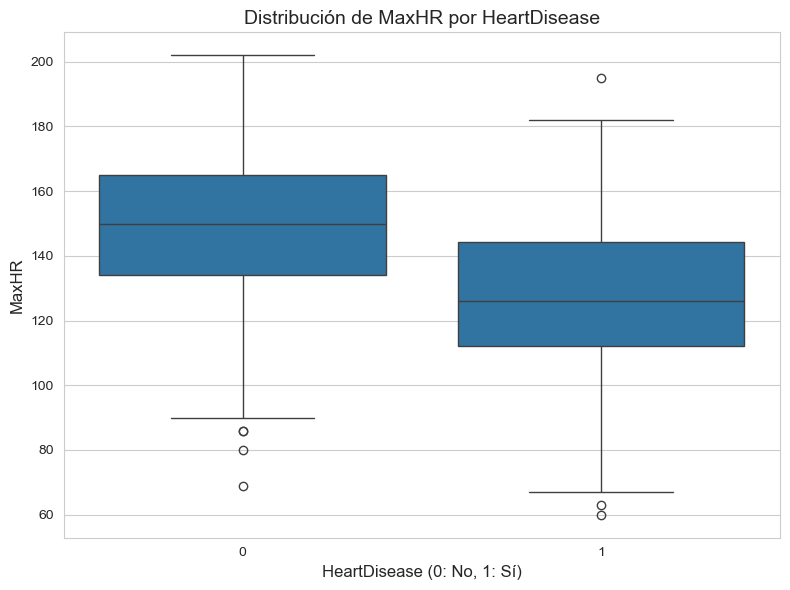

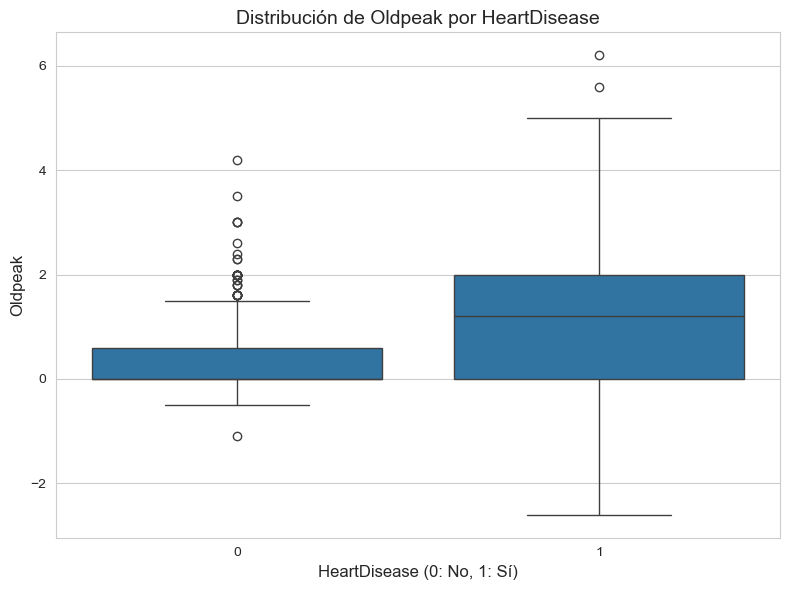

In [9]:
import seaborn as sns
# Seaborn Style Configuration
sns.set_style("whitegrid")
# Categorical Columns (Type 'object' in your info):
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Numeric Columns (Type 'int64' and 'float64', excluding the target variable):
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
all_features = categorical_cols + numerical_cols

# --- 2. Loop to generate visualizations ---
for col in all_features:
    plt.figure(figsize=(8, 6))

    if col in categorical_cols:
        # Grouped bar chart for categorical variables (Count)
        sns.countplot(x=col, hue='HeartDisease', data=df)
        plt.title(f'Conteo de HeartDisease por {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Conteo', fontsize=12)
        plt.legend(title='HeartDisease', labels=['No Enfermedad (0)', 'Sí Enfermedad (1)'])

    elif col in numerical_cols:
        # Boxplot for numerical variables (Distribution)
        sns.boxplot(x='HeartDisease', y=col, data=df)
        plt.title(f'Distribución de {col} por HeartDisease', fontsize=14)
        plt.xlabel('HeartDisease (0: No, 1: Sí)', fontsize=12)
        plt.ylabel(col, fontsize=12)

    plt.tight_layout()
    
    plt.show()

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

In [15]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [16]:
input_shape = X_train_processed.shape[1]
print(f"Dimensión de la entrada (features después de la codificación): {input_shape}")

Dimensión de la entrada (features después de la codificación): 20


In [17]:
# --- 2. MODEL CONSTRUCTION (TensorFlow/Keras) ---

# 2.1 Create the Sequential Model
model = Sequential([
    # Input layer (number of neurons = 32, active. ReLU)
    Dense(32, activation='relu', input_shape=(input_shape,)),
    # Additional hidden layer (to increase complexity)
    Dense(16, activation='relu'),
    # Output layer: 1 neuron, activation 'sigmoid' for binary classification (0 or 1)
    Dense(1, activation='sigmoid')
])

# 2.2 Model compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Loss function for binary classification
    metrics=['accuracy']
)

# 2.3 Visualization of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
print("\nStarting training...")
history = model.fit(
    X_train_processed, 
    y_train, 
    epochs=50,         # Number of times the model will see all the data
    batch_size=32,     # Batch size of data per step
    validation_split=0.1, # Use 10% of the training for validation
    verbose=0          # Show progress concisely
)
print("Training completed.")


Iniciando entrenamiento...
Entrenamiento finalizado.


In [20]:
y_pred_proba = model.predict(X_test_processed, verbose=0)
# Convert probabilities to binary classes (0 or 1)
y_pred_classes = (y_pred_proba > 0.5).astype(int).flatten()

In [21]:
# 4.1 Evaluation in test data
loss, accuracy = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"\n Accuracy in the test set: {accuracy:.4f}")

# 4.2 Example of a prediction
# Take the first 5 rows from the test set
sample_predictions = model.predict(X_test_processed[:5])

# Convert probabilities to binary classes (0 or 1)
predicted_classes = (sample_predictions > 0.5).astype(int)

print("\n--- Example of a prediction ---")
print("HeartDisease Probabilities (1): \n", sample_predictions.flatten())
print("Predicted Classes (0/1): \n", predicted_classes.flatten())
print("Actual Values ​​(Test): \n", y_test[:5].values)


✅ Precisión (Accuracy) en el conjunto de prueba: 0.8641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

--- Ejemplo de Predicciones ---
Probabilidades de HeartDisease (1): 
 [0.98622763 0.0965066  0.98207605 0.30839425 0.07014618]
Clases Predichas (0/1): 
 [1 0 1 0 0]
Valores Reales (Test): 
 [1 1 1 1 0]


<Figure size 800x600 with 0 Axes>

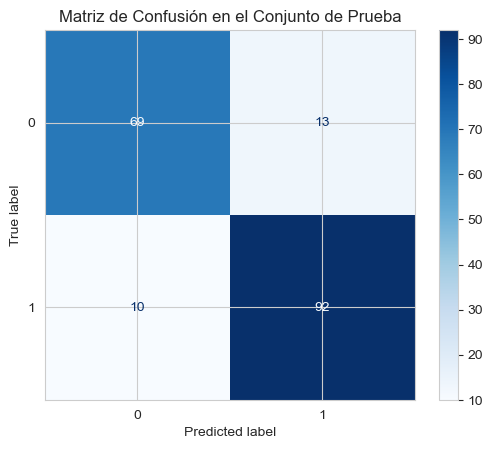

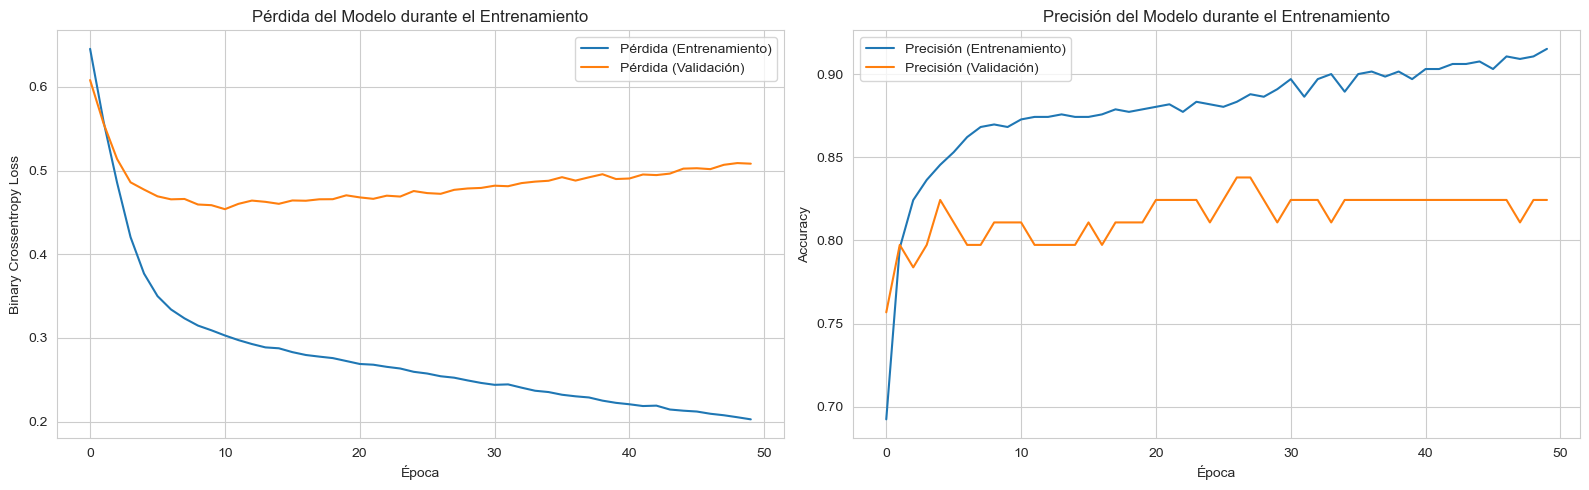

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión en el Conjunto de Prueba')
plt.show() # Use plt.show() to display in the environment

# Chart 2: Training History (Loss and Accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Loss Chart
ax1.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
ax1.plot(history.history['val_loss'], label='Pérdida (Validación)')
ax1.set_title('Pérdida del Modelo durante el Entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()

# Precision Chart
ax2.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
ax2.plot(history.history['val_accuracy'], label='Precisión (Validación)')
ax2.set_title('Precisión del Modelo durante el Entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()